<a href="https://colab.research.google.com/github/mariangellobon/IntroCienciaDatos-Apuntes/blob/main/Tema_6_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distancias

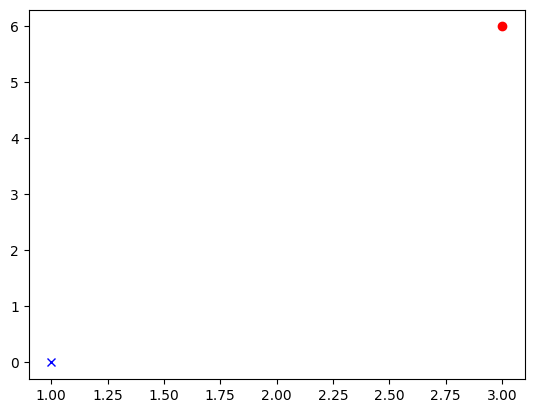

In [ ]:
from scipy.spatial import distance
a = [3,6]
b = [1,0]

# Plot the two points
from matplotlib import pyplot as plt
plt.plot(a[0], a[1], 'ro')
plt.plot(b[0], b[1], 'bx')
# plt.axis([0, 10, 0, 10])
plt.show()

In [ ]:
print(distance.euclidean(a,b))
print(distance.cityblock(a,b))

6.324555320336759
8


# SKLEARN

## PCA

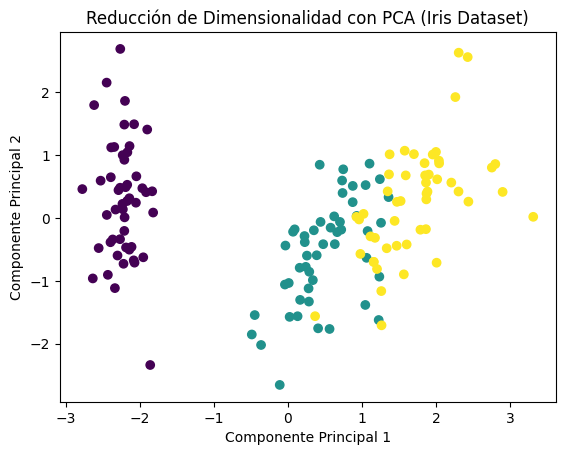

In [ ]:
# Importar librerías
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar el dataset
iris = load_iris()
X = iris.data  # Características
y = iris.target  # Etiquetas (no se usarán en PCA)

# Normalización de datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA para reducir a 2 dimensiones
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

# Visualización
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Reducción de Dimensionalidad con PCA (Iris Dataset)')
plt.show()

## K-Means

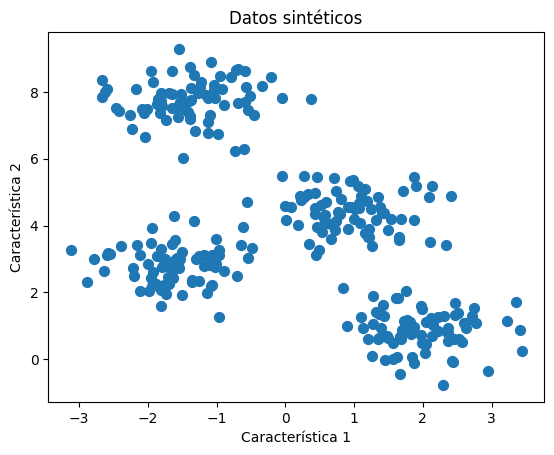

In [ ]:
# Importar librerías
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline


# 1. Cargar datos: Generar datos sintéticos
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

# Plot data points
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title('Datos sintéticos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


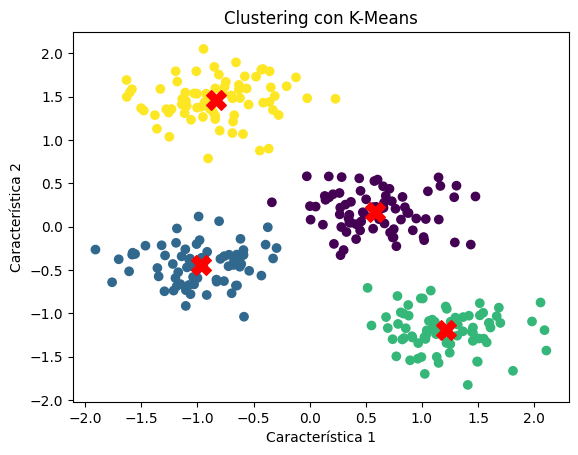

In [ ]:

# 2. Limpieza, preparación y división: Normalización de datos
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros: Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('kmeans', kmeans)
])
pipeline.fit(X)

# Visualización
labels = pipeline['kmeans'].labels_  # Obtienen las etiquetas asignadas a cada punto del training set
X_scaled = pipeline['scaler'].transform(X) # aplica solo el StandardScaler al training set para obtener los datos escalados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red')
plt.title('Clustering con K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

## Agglomerative hierarchical clustering

In [ ]:
# Importar librerías
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline

In [ ]:

# 1. Cargar datos: Generar datos sintéticos (mismos que K-Means)
# X, _ = make_blobs(n_samples=100, centers=3, cluster_std=0.50, random_state=0)
# Mismos datos que K-means

# 2. Limpieza, preparación y división: Normalización de datos
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros: Aplicar Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3)
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)])
pipeline.fit(X)


Pipeline(steps=[('scaler', StandardScaler()),
                ('model', AgglomerativeClustering(n_clusters=3))])

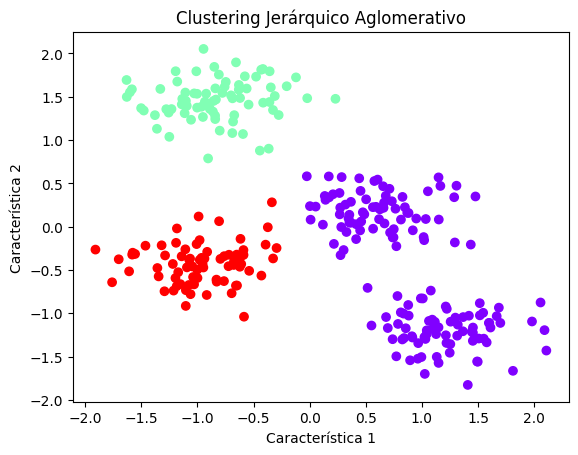

In [ ]:

# Visualización de Clústeres
labels = pipeline['model'].labels_  # Obtienen las etiquetas asignadas a cada punto del training set
X_scaled = pipeline['scaler'].transform(X) # aplica solo el StandardScaler al training set para obtener los datos escalados

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('Clustering Jerárquico Aglomerativo')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

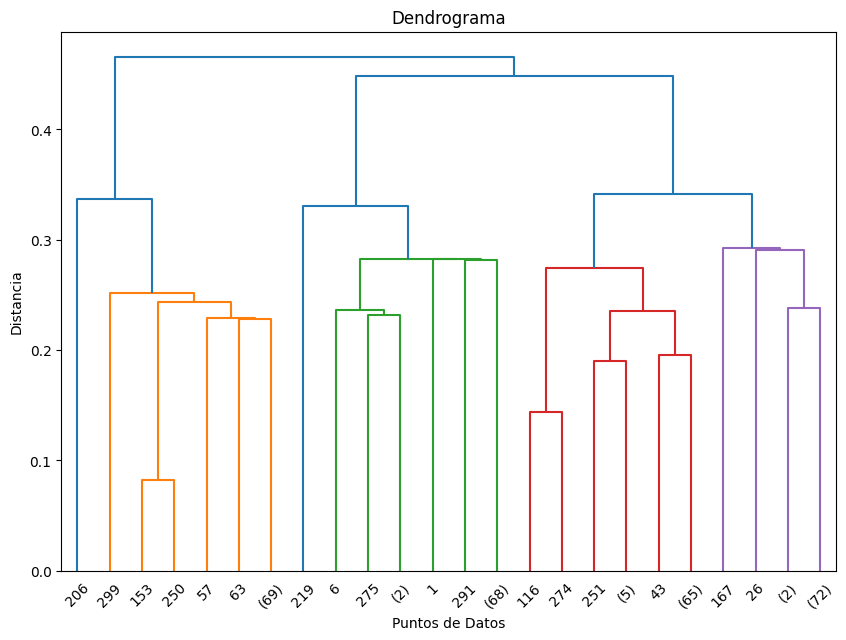

In [ ]:

# Generar Dendrograma
linked = linkage(X_scaled, 'single')

labelList = range(1, X_scaled.shape[0]+1)

plt.figure(figsize=(10, 7))
dendrogram(linked,
           labels=labelList,
           truncate_mode='level',  # mostrar sólo los primeros niveles
           p=5)
plt.title('Dendrograma')
plt.xlabel('Puntos de Datos')
plt.ylabel('Distancia')
plt.show()

## DBSCAN

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline

Ejemplo en el que KMeans no funciona bien

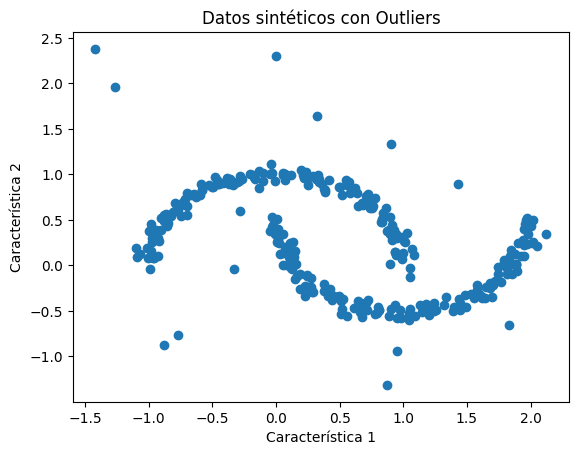

In [ ]:
# Generar datos sintéticos con forma de luna para ilustrar que DBSCAN trata bien los clústers no estéricos
X, _ = make_moons(n_samples=300, noise=0.05, random_state=0)

# Añadir outliers aleatorios
# Generamos 15 outliers aleatorios distribuidos uniformemente en un rango que abarca más allá de los datos originales
np.random.seed(42)
n_outliers = 15
outliers = np.random.uniform(low=-1.5, high=2.5, size=(n_outliers, 2))
X = np.vstack([X, outliers])

# Plot
plt.scatter(X[:, 0], X[:, 1])
plt.title('Datos sintéticos con Outliers')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

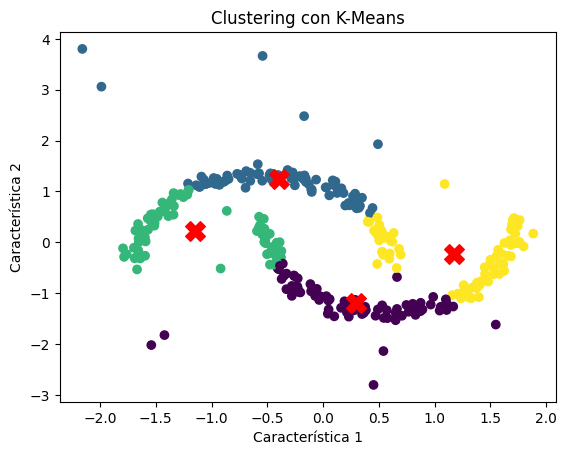

In [ ]:

# 2. Limpieza, preparación y división: Normalización de datos
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# 3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros: Aplicar K-Means
kmeans = KMeans(n_clusters=4, random_state=0)
pipeline = Pipeline(steps=[
    ('scaler', scaler),
    ('kmeans', kmeans)
])
pipeline.fit(X)

# Visualización
labels = pipeline['kmeans'].labels_  # Obtienen las etiquetas asignadas a cada punto del training set
X_scaled = pipeline['scaler'].transform(X) # aplica solo el StandardScaler al training set para obtener los datos escalados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, marker='X', c='red')
plt.title('Clustering con K-Means')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

No funciona muy bien. Qué tal funciona el jerárquico?

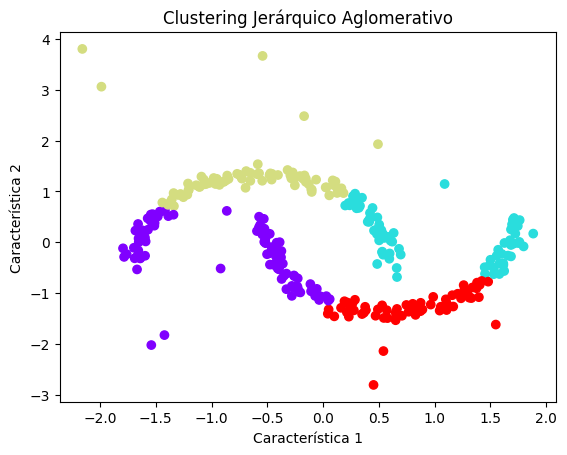

In [ ]:
# 3. Selección del modelo, entrenamiento, validación y ajuste de hiper parámetros: Aplicar Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=4)
pipeline = Pipeline([
    ('scaler', scaler),
    ('model', model)])
pipeline.fit(X)


# Visualización de Clústeres
labels = pipeline['model'].labels_  # Obtienen las etiquetas asignadas a cada punto del training set
X_scaled = pipeline['scaler'].transform(X) # aplica solo el StandardScaler al training set para obtener los datos escalados

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='rainbow')
plt.title('Clustering Jerárquico Aglomerativo')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

Tampoco funciona bien. En estos casos, DBSCAN al rescate!

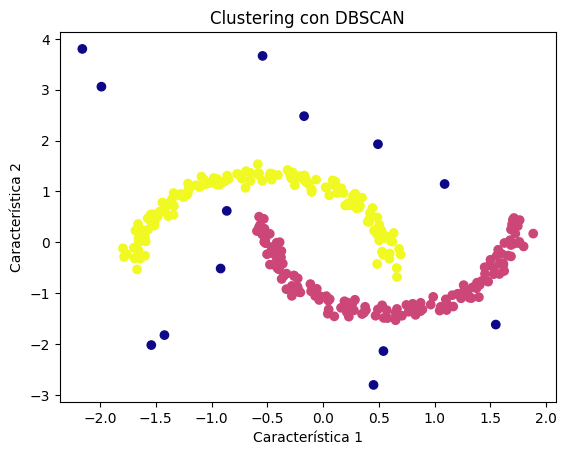

In [ ]:
# Normalización de datos
scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
pipeline = Pipeline([
    ('scaler', scaler),
    ('dbscan', dbscan)
])
pipeline.fit(X)
# labels = dbscan.fit_predict(X_scaled)

# Visualización
labels = pipeline['dbscan'].labels_  # Obtienen las etiquetas asignadas a cada punto del training set
X_scaled = pipeline['scaler'].transform(X) # aplica solo el StandardScaler al training set para obtener los datos escalados
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='plasma')
plt.title('Clustering con DBSCAN')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()


* Detección Efectiva de Outliers: DBSCAN ha identificado correctamente los outliers añadidos, etiquetándolos como ruido sin asignarlos a ningún clúster.
* Robustez del Algoritmo: La capacidad de DBSCAN para manejar outliers lo hace especialmente útil en análisis exploratorios donde los datos pueden contener ruido o valores atípicos.
* Interpretación Simplificada: Visualizar los outliers facilita la comprensión de la estructura de los datos y ayuda a tomar decisiones sobre posibles preprocesamientos adicionales, como la eliminación o el tratamiento de estos puntos.